In [1]:
import os
#os.chdir('../nfs/Shared/robust_federated_learning/')
import matplotlib.pyplot as plt
import matplotlib as mpl 
from util.draw_graphs import plot_all, plot_range
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
"""
Some experiment code refer from https://github.com/amitport/Towards-Federated-Learning-with-Byzantine-Robust-Client-Weighting

We consider the declare sample size originally, but remove it since it is not the main problem in our method


The server aggregator using numpy, but we find that the computation seems large
However, cupy and tf.tensor is not as convinient as numpy 


From 500 round of FL, we only update the model if the loss descend.
We do not use gradient clips but it might make the federated learning more robust.


Author: Cen-Jhih Li
Belongs: Academia Sinica, Institute of Statistical Science, Robust federated learning project
"""
plot_list = ['mean', 'median', 'gamma_mean_0_5', 'geometric_median']
gamma_list = [0.5, 0.2, 0.05, 0.01 ]
gamma_name = ['gamma_mean_{}'.format(str(gamma).replace(".","_")) for gamma in gamma_list]
SMALL_SIZE = 12
MEDIUM_SIZE = 22
BIGGER_SIZE = 30
SUPPER_BIG = 40

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Analize the results with and without covariance, record gradients and not record in gamma mean 

Then compare different gamma first

Finally, evaluate the results across different aggregators

Evaluate the results across different aggregators


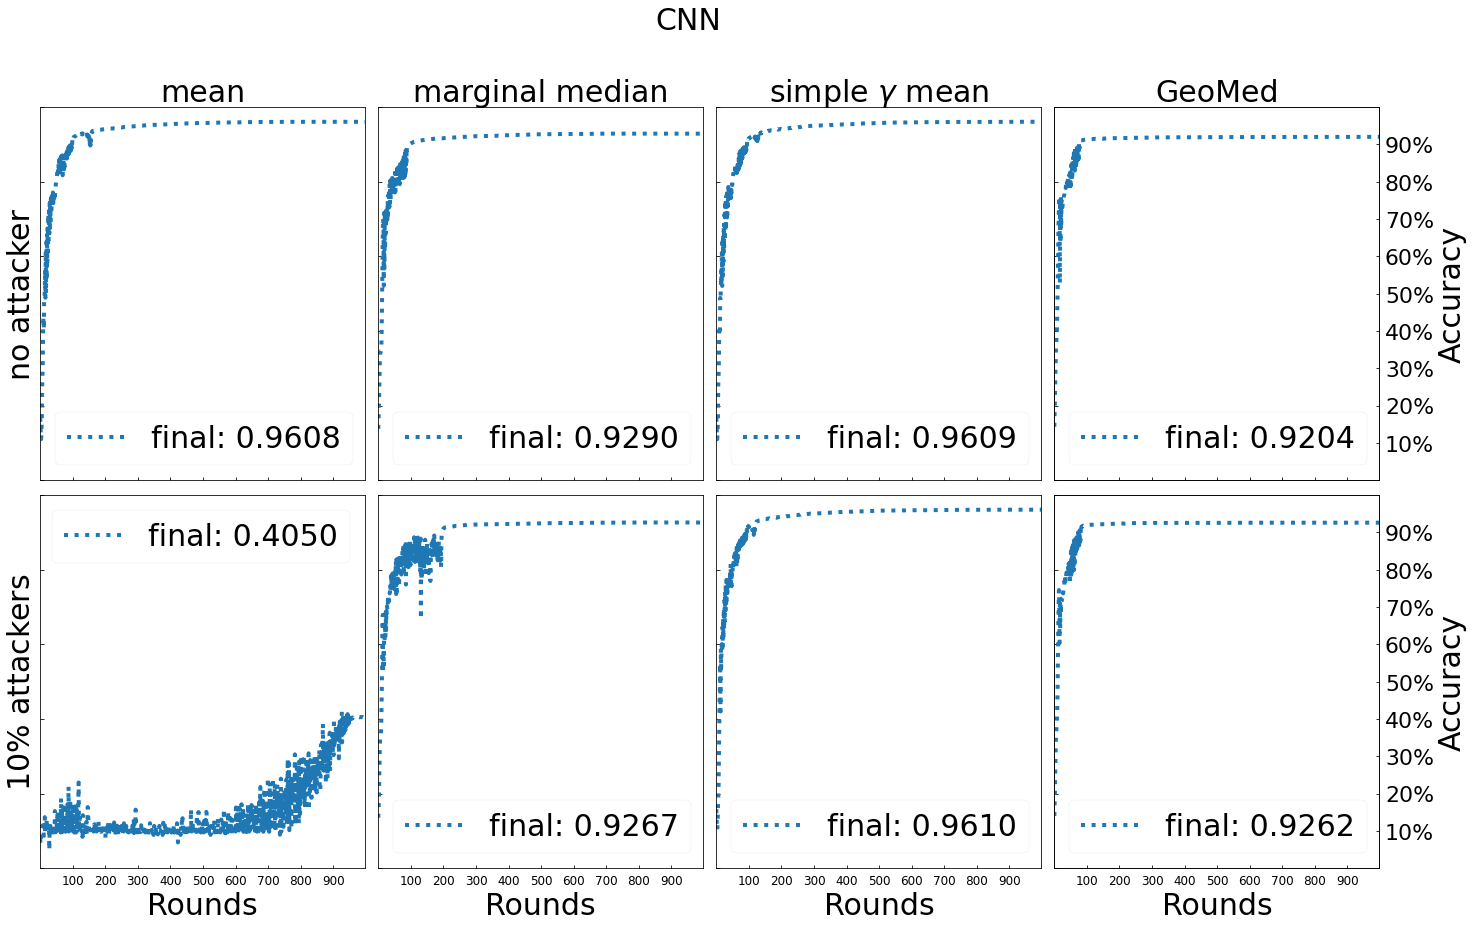

In [2]:
print('Evaluate the results across different aggregators')

plt.rc('font', size=BIGGER_SIZE)           # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)      # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)      # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)      # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)     # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)    # fontsize of the figure title

#experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'expr_MNIST_cnn', 1, 'all', 'random', 10, 1000000   
experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'final_expr_MNIST_LeNet', 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(2, 4, figsize=(24, 14), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8) = axs

right_axs = (ax4, ax8)
bottom_axs = (ax5, ax6, ax7, ax8)

plt.suptitle('CNN', fontsize=BIGGER_SIZE)
#plt.suptitle('LeNet', fontsize=BIGGER_SIZE)
ax1.set_title('mean')
ax2.set_title('marginal median')
ax3.set_title(r'simple $\gamma$ mean')
ax4.set_title('GeoMed')


ax1.set_ylabel('no attacker')
ax1.set_ylim(0, 1) # (0.85, 1)

ax5.set_ylabel('$10\%$ attackers')
ax5.set_ylim(0, 1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(1, 10)])

#plot_list = ['mean', 'median', 'gamma_mean_0_5_median', 'geometric_median', 't_mean_10']
for i, aggr in enumerate(['mean', 'median', 'gamma_mean_0_5_median', 'geometric_median']):
    attack_type = 'no_attacks'
    if 'gamma_mean' in aggr:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    else:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1, label_final=True)
    attack_type = 'random'
    if 'gamma_mean' in aggr:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    else:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1, label_final=True)

#ax8.legend(
#           labels=['no cov', 'no cov with record gradients', 'with cov', 'with cov with record gradients'],   # The labels for each line
#           loc="lower center",   # Position of legend
#            borderpad=0.5,    # Small spacing around legend box
#            title="gamma mean type",  # Title for the legend
#         fontsize=MEDIUM_SIZE,
#           bbox_to_anchor=(0.5,-0.26),
#           fancybox=True, 
#            shadow=True,
#           ncol=2
#)
for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

#fig.savefig('plot/exp_MNIST_CNN_attackers_10.png', format='png', bbox_inches='tight')
fig.savefig('plot/exp_MNIST_LeNet_attackers_10.png', format='png', bbox_inches='tight')

Evaluate the results across different aggregators


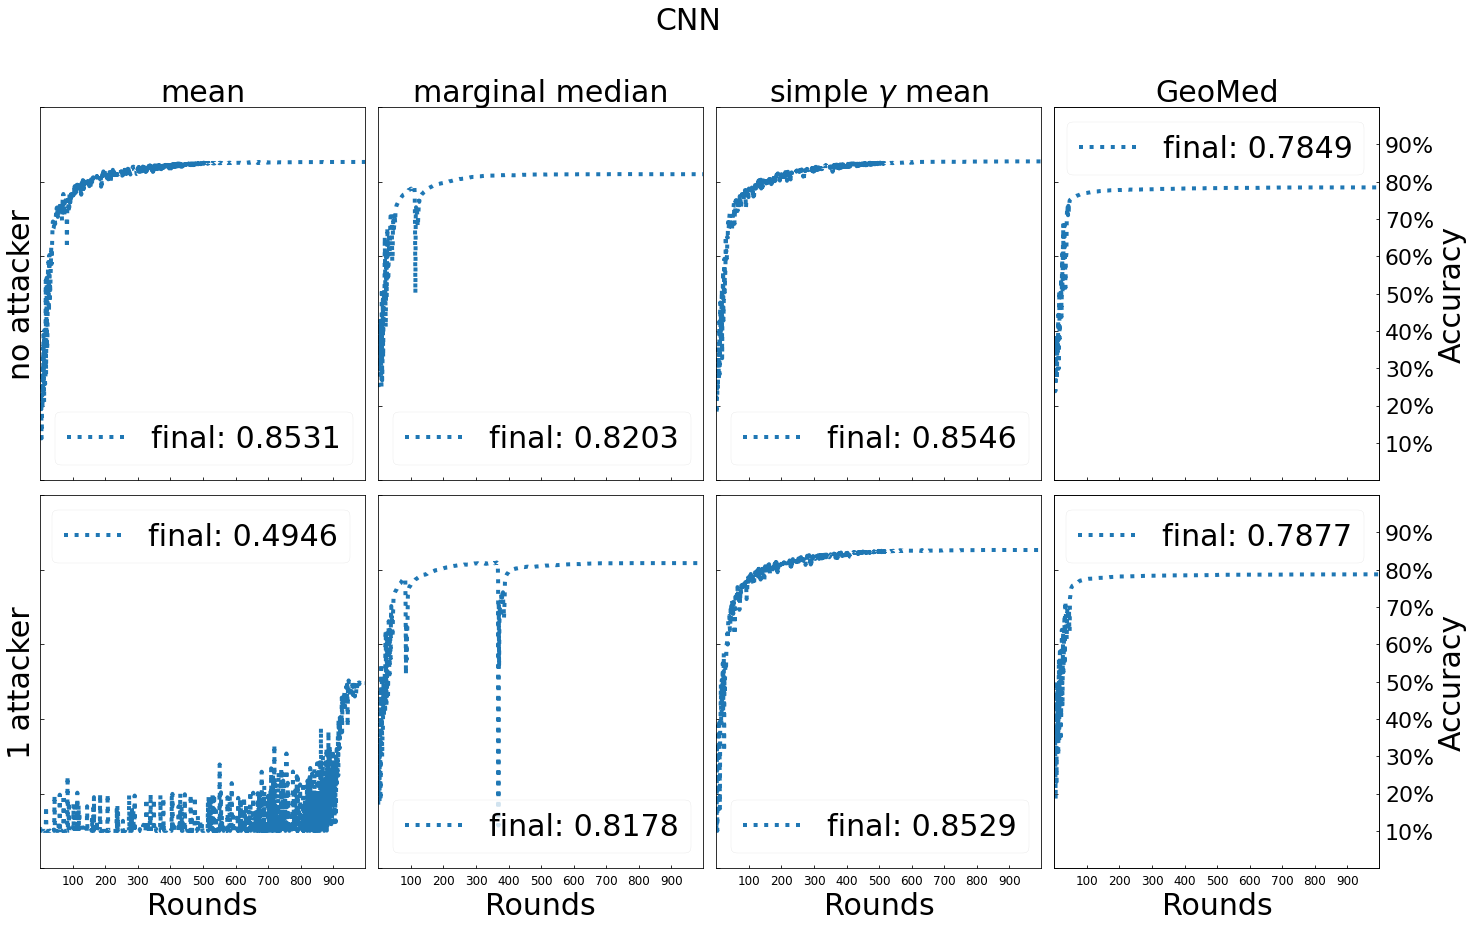

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

print('Evaluate the results across different aggregators')

plt.rc('font', size=BIGGER_SIZE)           # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)      # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)      # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)      # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)     # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)    # fontsize of the figure title

#experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'expr_fashion_cnn', 1, 'all', 'random', 10, 1000000   
experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'final_expr_fashion_LeNet', 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(2, 4, figsize=(24, 14), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8) = axs

right_axs = (ax4, ax8)
bottom_axs = (ax5, ax6, ax7, ax8)

plt.suptitle('CNN', fontsize=BIGGER_SIZE)
#plt.suptitle('LeNet', fontsize=BIGGER_SIZE)
ax1.set_title('mean')
ax2.set_title('marginal median')
ax3.set_title(r'simple $\gamma$ mean')
ax4.set_title('GeoMed')

ax1.set_ylabel('no attacker')
ax1.set_ylim(0, 1) # (0.85, 1)

ax5.set_ylabel('$10\%$ attackers')
ax5.set_ylim(0, 1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(1, 10)])

#plot_list = ['mean', 'median', 'gamma_mean_0_5_median', 'geometric_median', 't_mean_10']
for i, aggr in enumerate(['mean', 'median', 'gamma_mean_0_5_median', 'geometric_median']):
    attack_type = 'no_attacks'
    if 'gamma_mean' in aggr:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    else:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1, label_final=True)
    attack_type = 'random'
    if 'gamma_mean' in aggr:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    else:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1, label_final=True)

#ax8.legend(
#           labels=['no cov', 'no cov with record gradients', 'with cov', 'with cov with record gradients'],   # The labels for each line
#           loc="lower center",   # Position of legend
#            borderpad=0.5,    # Small spacing around legend box
#            title="gamma mean type",  # Title for the legend
#         fontsize=MEDIUM_SIZE,
#           bbox_to_anchor=(0.5,-0.26),
#           fancybox=True, 
#            shadow=True,
#           ncol=2
#)
for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()
    
#fig.savefig('plot/exp_fashion_CNN_attackers_10.png', format='png', bbox_inches='tight')
fig.savefig('plot/exp_fashion_LeNet_attackers_10.png', format='png', bbox_inches='tight')

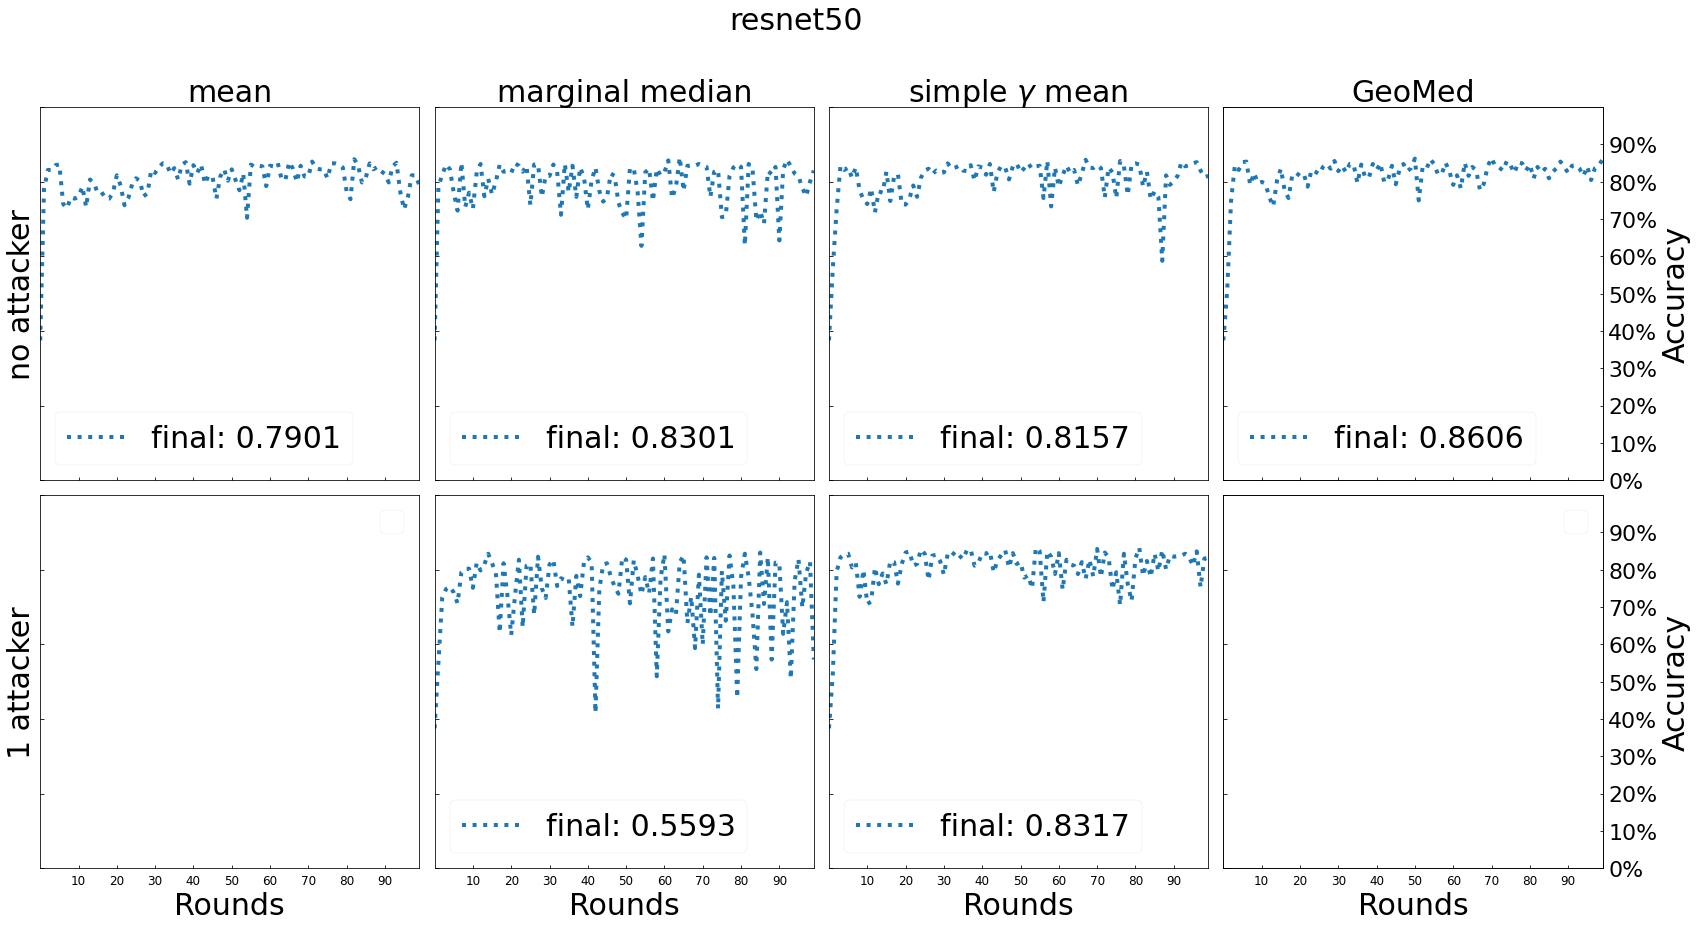

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

plt.rc('font', size=BIGGER_SIZE)           # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)      # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)      # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)      # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)     # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)    # fontsize of the figure title

experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'final_expr_pneumonia_selfval_resnet_avg_9client', 1, 'all', 'random', 20, 1000000   
fig, axs = plt.subplots(2, 4, figsize=(28, 14), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8) = axs

right_axs = (ax4, ax8)
bottom_axs = (ax5, ax6, ax7, ax8)

plt.suptitle('resnet50')
ax1.set_title('mean')
ax2.set_title('marginal median')
ax3.set_title(r'simple $\gamma$ mean')
ax4.set_title('GeoMed')

ax1.set_ylabel('no attacker')
ax1.set_ylim(0, 1) # (0.85, 1)

ax5.set_ylabel('1 attacker')
ax5.set_ylim(0, 1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[-1][i].set_xticks(range(10, 100, 10))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(0, 10)])
    
plot_list = ['mean', 'median', 'simple_gamma_mean_0_5_median', 'geometric_median']
for i, aggr in enumerate(plot_list):
    attack_type = 'no_attack'
    if 'gamma_mean' in aggr:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    else:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1, label_final=True)
    attack_type = 'random'
    if 'gamma_mean' in aggr:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    else:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1, label_final=True)

#ax8.legend(
#           labels=['no cov', 'no cov with record gradients', 'with cov', 'with cov with record gradients'],   # The labels for each line
#           loc="lower center",   # Position of legend
#            borderpad=0.5,    # Small spacing around legend box
#            title="gamma mean type",  # Title for the legend
#         fontsize=MEDIUM_SIZE,
#           bbox_to_anchor=(0.5,-0.26),
#           fancybox=True, 
#            shadow=True,
#           ncol=2
#)
for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()
    
fig.savefig('plot/{}_attackers_20.png'.format(experiment), format='png', bbox_inches='tight')

Total number of validation examples:  (624, 150, 150, 3)
Total number of labels: (624,)
loss = 0.5316956639289856, accuracy = 0.8605769276618958, precision = 0.8633093237876892, recall = 0.9230769276618958, total 100 rounds federated learning 


<Figure size 460.8x316.8 with 0 Axes>

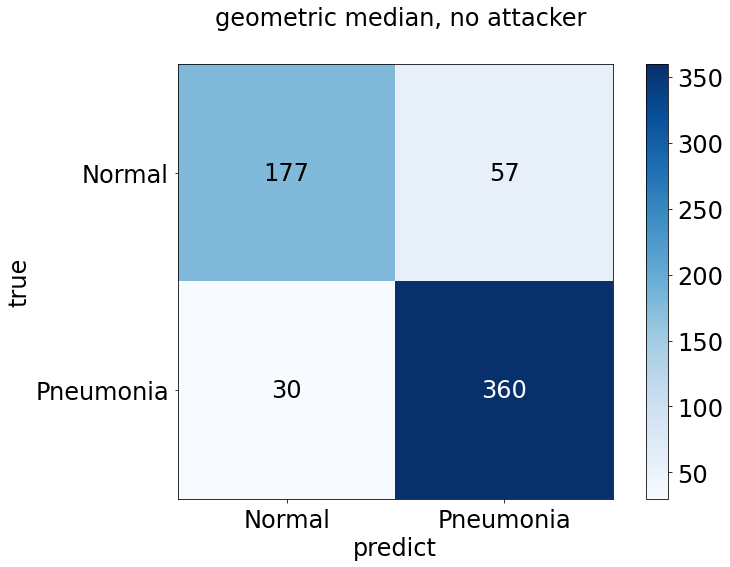

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib as mpl 
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
from prepare_data.pneumonia import load_data, load_img

plt.rc('font', size=24)           # controls default text sizes
plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=24)      # fontsize of the x and y labels
plt.rc('xtick', labelsize=24)      # fontsize of the tick labels
plt.rc('ytick', labelsize=24)     # fontsize of the tick labels
plt.rc('legend', fontsize=24)     # legend fontsize
plt.rc('figure', titlesize=24)    # fontsize of the figure title
from util.model import res_model
from pathlib import Path

model = res_model(pooling = 'avg')()
input_shape = (150,150)
#input_shape = (224,224)
initial_lr = 1e-4
epochs = 1000
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(initial_lr, decay = 1e-5)
model.compile(
      optimizer = optimizer,
      loss = loss_fn,
      metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
      ],
    )
batch_size = 16

exp = 'final_expr_pneumonia_selfval_resnet_avg_9client' + '_no_attack'
#method, title = 'mean', 'mean'
method, title = 'simple_gamma_mean_0_5_median', r'simple $\gamma$ mean ($\gamma$ = 0.5)'
#method, title = 'gamma_mean_0_5_median' , r'$\gamma$ mean ($\gamma$ = 0.5)'
#method, title = 'median', 'marginal median'
#method, title = 'geometric_median', 'geometric median'

expr_file = Path('./experiments/{}/seed_1/{}_cpr_all.npz'.format(exp, method))

root_path = Path('./prepare_data/CellData/chest_xray')
train_dir = root_path / 'train'
val_dir = root_path / 'val'
test_dir = root_path / 'test'

if expr_file.is_file():
    prev_results = np.load(expr_file, allow_pickle=True)
    server_weights = prev_results['server_weights'].tolist()
    model.set_weights(server_weights)
    history = prev_results['history'].tolist()
    history_delta_sum = prev_results['history_delta_sum'].tolist()
    FL_round = len(history)
    
    test_x, test_y = load_img(test_dir, input_shape = input_shape)
    print("Total number of validation examples: ", test_x.shape)
    print("Total number of labels:", test_y.shape)
    
    loss, acc, precision, recall = model.evaluate(test_x, test_y, verbose=0, batch_size=16)
    #Great recall, low false negative (type-2 error)
    print("loss = {}, accuracy = {}, precision = {}, recall = {}, total {} rounds federated learning "\
          .format(loss,acc, precision, recall,FL_round))

    # Get the confusion matrix
    # Get predictions
    preds = model.predict(test_x, batch_size=16)
    preds = np.around(preds).astype(int)
    # Original labels = test_y
    from mlxtend.plotting import plot_confusion_matrix
    from sklearn.metrics import confusion_matrix
    cm  = confusion_matrix(test_y, preds)
    plt.figure()
    fig, ax = plot_confusion_matrix(cm, figsize = (12,8), hide_ticks=True,cmap=plt.cm.Blues, colorbar = True)
    plt.suptitle('{}, no attacker'.format(title))
    ax.set_ylabel('true', fontsize = 24)
    ax.set_xlabel('predict', fontsize = 24)
    plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize = 24)
    plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize = 24)
    plt.show()
    fig.savefig('plot/{}_{}_confusion_matrix.png'.format(exp, method), format='png', bbox_inches='tight')
else:
    print('{} does not exist, please run experiment first.'.format(expr_file))

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib as mpl 
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
from prepare_data.pneumonia import load_data, load_img

plt.rc('font', size=24)           # controls default text sizes
plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=24)      # fontsize of the x and y labels
plt.rc('xtick', labelsize=24)      # fontsize of the tick labels
plt.rc('ytick', labelsize=24)     # fontsize of the tick labels
plt.rc('legend', fontsize=24)     # legend fontsize
plt.rc('figure', titlesize=24)    # fontsize of the figure title
from util.model import res_model
from pathlib import Path

model = res_model(pooling = 'avg')()
input_shape = (150,150)
#input_shape = (224,224)
initial_lr = 1e-4
epochs = 1000
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(initial_lr, decay = 1e-5)
model.compile(
      optimizer = optimizer,
      loss = loss_fn,
      metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
      ],
    )
batch_size = 16

exp = 'final_expr_pneumonia_selfval_resnet_avg_9client' + '_random'
#method, title = 'mean', 'mean'
method, title = 'simple_gamma_mean_0_5_median', r'simple $\gamma$ mean ($\gamma$ = 0.5)'
#method, title = 'gamma_mean_0_5_median' , r'$\gamma$ mean ($\gamma$ = 0.5)'
#method, title = 'median', 'marginal median'
#method, title = 'geometric_median', 'geometric median'

expr_file = Path('./experiments/{}/seed_1/{}_cpr_all_b_random_20_1000000.npz'.format(exp, method))

root_path = Path('./prepare_data/CellData/chest_xray')
train_dir = root_path / 'train'
val_dir = root_path / 'val'
test_dir = root_path / 'test'

if expr_file.is_file():
    prev_results = np.load(expr_file, allow_pickle=True)
    server_weights = prev_results['server_weights'].tolist()
    model.set_weights(server_weights)
    history = prev_results['history'].tolist()
    history_delta_sum = prev_results['history_delta_sum'].tolist()
    FL_round = len(history)
    
    test_x, test_y = load_img(test_dir, input_shape = input_shape)
    print("Total number of validation examples: ", test_x.shape)
    print("Total number of labels:", test_y.shape)
    
    loss, acc, precision, recall = model.evaluate(test_x, test_y, verbose=0, batch_size=16)
    #Great recall, low false negative (type-2 error)
    print("loss = {}, accuracy = {}, precision = {}, recall = {}, total {} rounds federated learning "\
          .format(loss,acc, precision, recall,FL_round))

    # Get the confusion matrix
    # Get predictions
    preds = model.predict(test_x, batch_size=16)
    preds = np.around(preds).astype(int)
    # Original labels = test_y
    from mlxtend.plotting import plot_confusion_matrix
    from sklearn.metrics import confusion_matrix
    cm  = confusion_matrix(test_y, preds)
    plt.figure()
    fig, ax = plot_confusion_matrix(cm, figsize = (12,8), hide_ticks=True,cmap=plt.cm.Blues, colorbar = True)
    plt.suptitle('{}, 1 attacker'.format(title))
    ax.set_ylabel('true', fontsize = 24)
    ax.set_xlabel('predict', fontsize = 24)
    plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize = 24)
    plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize = 24)
    plt.show()
    fig.savefig('plot/{}_{}_confusion_matrix.png'.format(exp, method), format='png', bbox_inches='tight')
else:
    print('{} does not exist, please run experiment first.'.format(expr_file))

experiments\final_expr_pneumonia_selfval_resnet_avg_9client_random\seed_1\geometric_median_cpr_all_b_random_20_1000000.npz does not exist, please run experiment first.
